In [ ]:
## Author : Saurabh Kumar 
## Date :9/June

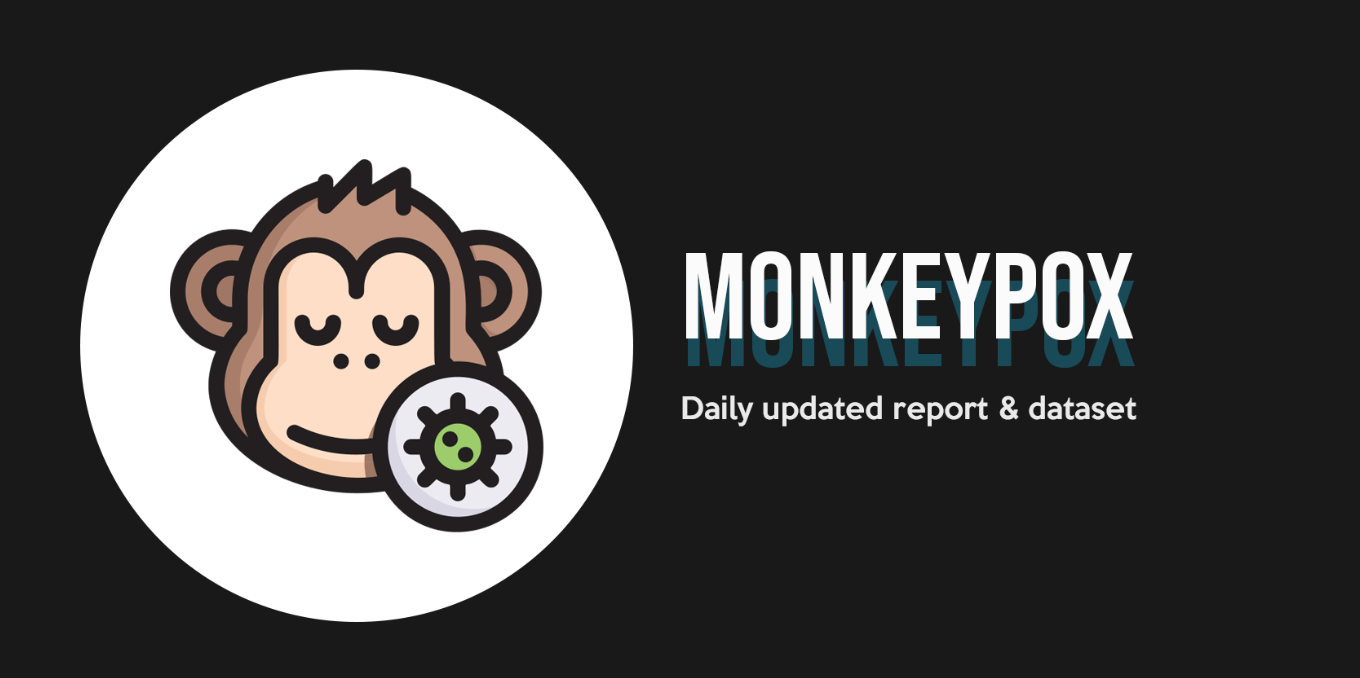

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pycountry as pc
import seaborn as sns
sns.set_style('darkgrid')
import plotly.io as pio
pio.templates.default = "plotly_dark"
import plotly 
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS
from scipy import signal

#Supress Warning
import warnings
warnings.filterwarnings('ignore')

#map and other location lib
import folium
from folium import Marker
from folium.plugins import MarkerCluster

#to make shell more intractive
from IPython.display import display

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

In [3]:
pwd

'E:\\DataScience\\MachineLearning\\MonkeyPox_Data'

In [4]:
import os
os.listdir()

['.ipynb_checkpoints', 'monkeypox_df.csv', 'Untitled.ipynb']

In [5]:
path ='E:\\DataScience\\MachineLearning\\MonkeyPox_Data'

In [6]:
df=pd.read_csv(path+'\\monkeypox_df.csv')

In [7]:
data_df1 = df[['Date_confirmation','ID']].groupby('Date_confirmation').agg('count').reset_index()
data_df1['Accumulated Cases'] = data_df1['ID'].cumsum()
data_df1.rename({'ID':'Count'}, axis = 1, inplace = True)

In [8]:
fig = px.line(data_df1,x='Date_confirmation',y='Accumulated Cases',markers=True,title='Daily Cases Updates')
fig.show()

## Top 15 Countries Which have highest Cases

In [9]:
fig = px.pie(df, values=df['Country'].value_counts().nlargest(15), names=df['Country'].value_counts().nlargest(15).index
             , title='Top 15 Countries Which have highest Cases')
fig.show()

## Daily Increase In Cases 

In [10]:
x, y = df['Date_confirmation'],df['ID']
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,
                    mode='lines+markers',
                    name='lines+markers'))
fig.update_xaxes(title_text='Dates')
fig.update_yaxes(title_text='Numbers of Cases')
fig.show()

## Top Cities Which have Highest Numbers of Cases

In [11]:
fig = px.bar(df,x=df['City'].value_counts().nlargest(15).index,y=df['City'].value_counts().nlargest(15),
            color=df['City'].value_counts().nlargest(15),title="Top Cities Which have Highest Numbers of Cases")
fig.update_xaxes(title_text='Cities')
fig.update_yaxes(title_text='Numbers of Cases')
fig.show()

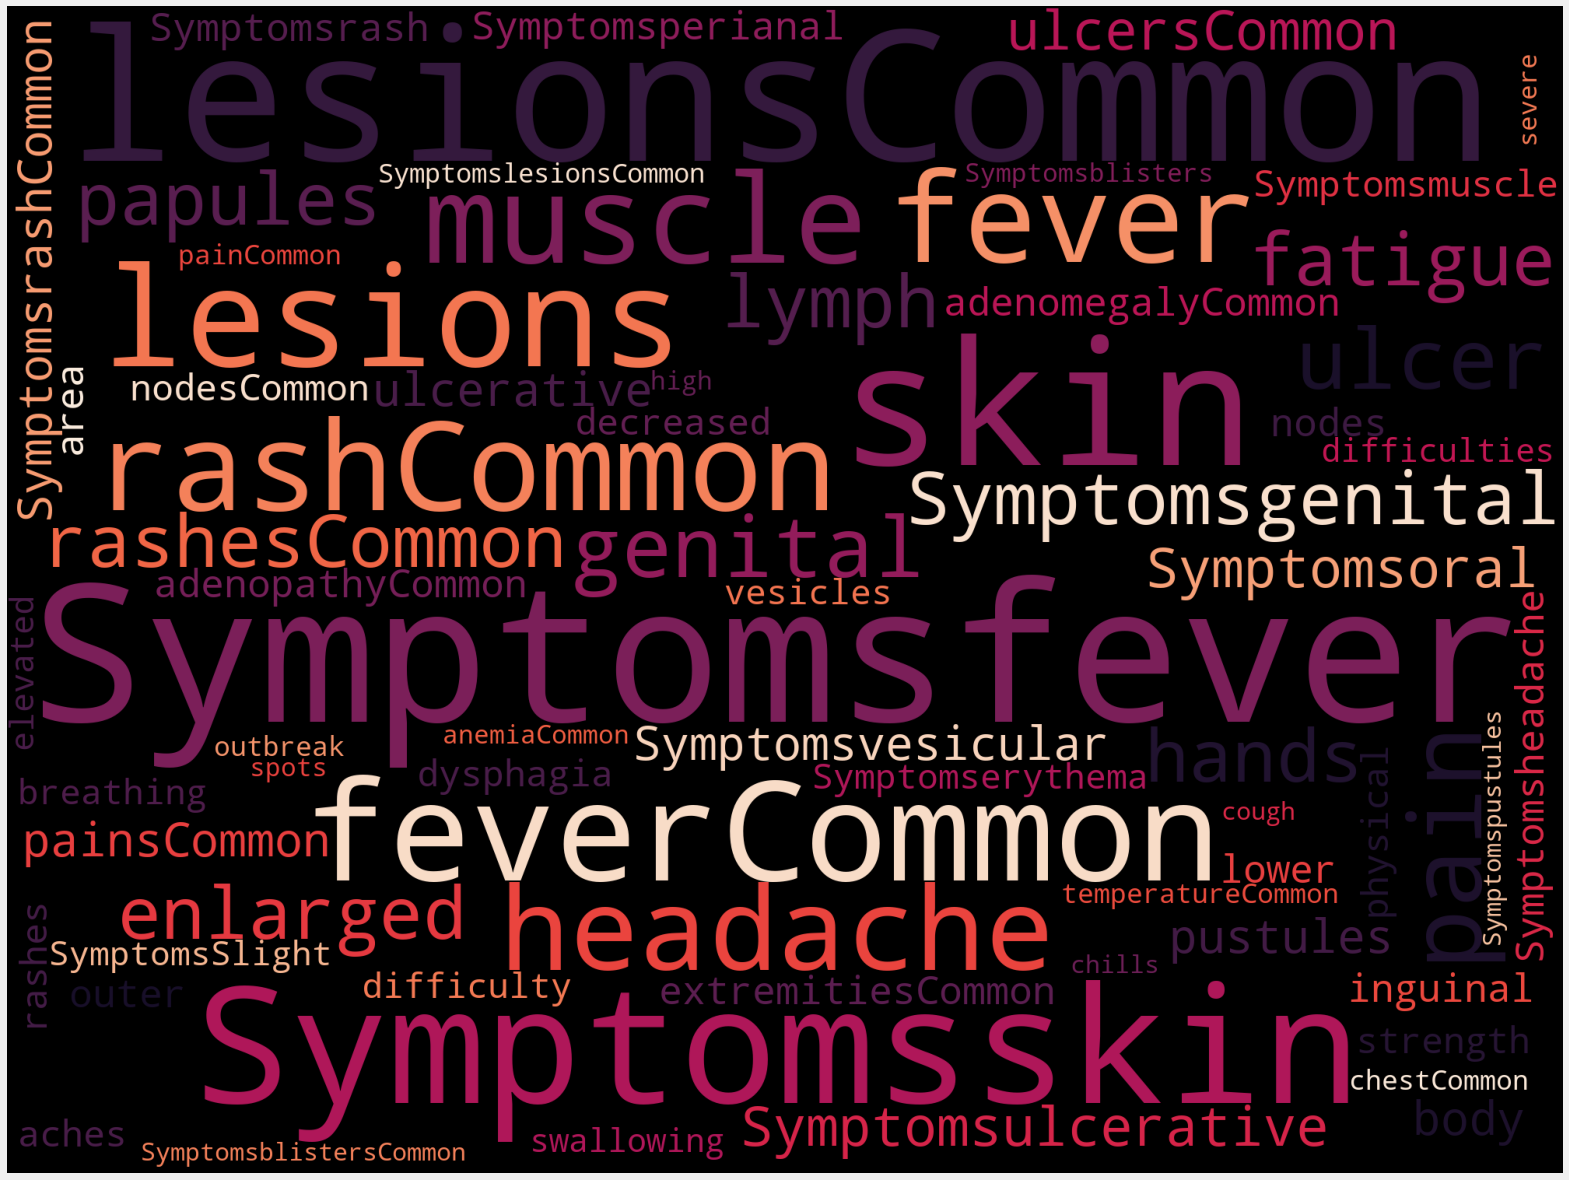

In [12]:
text ="Common Symptoms".join(cat for cat in df['Symptoms'].value_counts().index)
stop_words =list(STOPWORDS)+ ["on", "the", ";",",","of","an","and"]
wordcloud = WordCloud(width=2000,height=1500,stopwords=stop_words,background_color='black',
                     colormap='rocket_r',collocations=False, random_state=2022).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Common Symptoms

In [13]:
fig = px.pie(df, values=df['Symptoms'].value_counts().nlargest(10), names=df['Symptoms'].value_counts().nlargest(10).index
             , title='10 Common Symptoms',hole = .65)
fig.show()

In [14]:
data_df2 = df[['Country_ISO3','ID']].groupby('Country_ISO3').agg('count').reset_index()
data_df2.rename({'ID':'Total'}, axis = 1, inplace = True)

## Distribution of Confirmed Cases using Bubble Maps

In [28]:
fig = px.scatter_geo(data_df2, locations="Country_ISO3", 
                     color="Total",
                     hover_name="Country_ISO3", 
                     size="Total",
                     title = 'Distribution of Confirmed Cases using Bubble Maps',
                     projection="natural earth",
                     color_continuous_scale =px.colors.sequential.Rainbow
                    )
fig.show()

## Distribution of Confirmed Cases World Map

In [29]:
fig = px.choropleth(data_df2,
                    locations = "Country_ISO3",
                    color = "Total",
                    hover_name = "Country_ISO3",
                    color_continuous_scale =px.colors.sequential.Rainbow,
                    template = 'plotly_dark',
                    title = 'Distribution of Confirmed Cases World Map',
                    height = 600,
                    width = 1000,
                   )
fig.show()

## Distribution of Confirmed Cases in World Map

In [17]:
fig = px.choropleth(data_df2,
                    locations = "Country_ISO3",
                    color = "Total",
                    hover_name = "Country_ISO3",
                    color_continuous_scale =px.colors.sequential.Rainbow,
                    projection = 'orthographic',
                    title = 'Distribution of Confirmed Cases in World Map',
                    height = 600,
                    width = 1000,
                   )
fig.update_geos(lataxis_showgrid = True,
                lonaxis_showgrid = True,
                showcountries = True,
               )

fig.update_geos(lataxis = {'gridcolor':'#222222'},
                lonaxis = {'gridcolor':'#222222'},
               )
fig.show()

## European Distribution of Confirmed Monkeypox Cases

In [18]:
fig = px.choropleth(data_df2,
                    locations = "Country_ISO3",
                    color = "Total",
                    hover_name = "Country_ISO3",
                    scope = 'europe',
                    color_continuous_scale =px.colors.sequential.Rainbow,
                    title = 'European Distribution of Confirmed Monkeypox Cases',
                    height = 800,
                    width = 1000,
                   )
fig.update_geos(lataxis_showgrid = True,
                lonaxis_showgrid = True,
                showcountries = True,
               )

fig.update_geos(lataxis = {'gridcolor':'#222222'},
                lonaxis = {'gridcolor':'#222222'},
               )
fig.show()

## North america Distribution of Confirmed Monkeypox Cases

In [19]:
fig = px.choropleth(data_df2,
                    locations = "Country_ISO3",
                    color = "Total",
                    hover_name = "Country_ISO3",
                    scope = 'north america',
                    color_continuous_scale =px.colors.sequential.Rainbow,
                    title = 'North america Distribution of Confirmed Monkeypox Cases',
                    height = 800,
                    width = 1000,
                   )
fig.update_geos(lataxis_showgrid = True,
                lonaxis_showgrid = True,
                showcountries = True,
               )

fig.update_geos(lataxis = {'gridcolor':'#222222'},
                lonaxis = {'gridcolor':'#222222'},
               )
fig.show()

## Asia Distribution of Confirmed Monkeypox Cases

In [21]:
fig = px.choropleth(data_df2,
                    locations = "Country_ISO3",
                    color = "Total",
                    hover_name = "Country_ISO3",
                    scope = 'asia',
                    color_continuous_scale =px.colors.sequential.Rainbow,
                    title = 'Asia Distribution of Confirmed Monkeypox Cases',
                    height = 800,
                    width = 1000,
                   )
fig.update_geos(lataxis_showgrid = True,
                lonaxis_showgrid = True,
                showcountries = True,
               )

fig.update_geos(lataxis = {'gridcolor':'#222222'},
                lonaxis = {'gridcolor':'#222222'},
               )
fig.show()

# Testing Kit Type Used

In [22]:
fig = px.bar(df,x=df['Confirmation_method'].value_counts().index,y=df['Confirmation_method'].value_counts(),
            color=df['Confirmation_method'].value_counts().nlargest(15),title="Testing Kit Type Used")
fig.update_xaxes(title_text='Test Kit')
fig.update_yaxes(title_text='Numbers of Cases Count')
fig.show()

## Confirmed Cases of Countries due to Travel History

In [23]:
colors = px.colors.sequential.algae_r
fig = go.Figure(data=[go.Pie(labels=df['Travel_history_country'].value_counts().index,
                             values=df['Travel_history_country'].value_counts(),hole = .75,)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=15,
                  marker=dict(colors=colors))
fig.update_layout(
    title_text = "Confirmed Cases of Countries due to Travel History",
    height = 600)
fig.show()

## Confirmed Cases having Travel History Distribution

In [24]:
colors = px.colors.sequential.Viridis
fig = go.Figure(data=[go.Pie(labels=df['Travel_history (Y/N/NA)'].value_counts().index,
                             values=df['Travel_history (Y/N/NA)'].value_counts(),hole = .75,)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors))
fig.update_layout(
    title_text = "Confirmed Cases having Travel History",
    height = 600)
fig.show()

## Confirmed Cases Hospitalised (Y/N/NA)

In [25]:
fig = px.bar(df,y=df['Hospitalised (Y/N/NA)'].value_counts().index,x=df['Hospitalised (Y/N/NA)'].value_counts(),
            color=df['Hospitalised (Y/N/NA)'].value_counts(),title="Confirmed Cases Hospitalised (Y/N/NA)")
fig.update_xaxes(title_text='Cases')
fig.update_yaxes(title_text='Hospitalised (Y/N/NA)')
fig.show()

## Confirmed Cases Gender Distribution

In [26]:
fig = px.bar(df,y=df['Gender'].value_counts().index,x=df['Gender'].value_counts(),
            color=df['Gender'].value_counts(),title="Confirmed Cases Gender Distribution")
fig.update_xaxes(title_text='Cases')
fig.update_yaxes(title_text='Gender')
fig.show()